In [2]:
# IMAGE PREPROCESSING

In [3]:
import keras

In [4]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Dataset/Dataset/train_set',
                                          target_size=(128,128),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


In [7]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM/Dataset/Dataset/test_set',
                                        target_size=(128,128),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


In [8]:
# MODEL BUILDING

In [9]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [10]:
model=Sequential()

In [11]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

In [12]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [14]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 58s 4s/step - loss: 3.3268 - accuracy: 0.6904 - val_loss: 0.2014 - val_accuracy: 0.9504
Epoch 2/10
14/14 [==============================] - 27s 2s/step - loss: 0.3365 - accuracy: 0.8693 - val_loss: 0.2410 - val_accuracy: 0.9421
Epoch 3/10
14/14 [==============================] - 27s 2s/step - loss: 0.2675 - accuracy: 0.8991 - val_loss: 0.1215 - val_accuracy: 0.9752
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.2446 - accuracy: 0.9106 - val_loss: 0.1277 - val_accuracy: 0.9504
Epoch 5/10
14/14 [==============================] - 29s 2s/step - loss: 0.2869 - accuracy: 0.8922 - val_loss: 0.1695 - val_accuracy: 0.9669
Epoch 6/10
14/14 [==============================] - 27s 2s/step - loss: 0.3132 - accuracy: 0.8853 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 0.3306 - accuracy: 0.8693 - val_loss: 0.0955 - val_accuracy: 0.9669
Epoch 8/10
14/14 [==

In [15]:
model.save("forest.h5")

In [16]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model('forest.h5')
img=image.load_img('/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [17]:
pred=model.predict(x)

1/1 [==============================] - 0s 109ms/step


In [18]:
pred

array([[0.]], dtype=float32)

In [19]:
# VIDEO ANALYSIS

In [25]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='AC2a45c94082d15fd26a52ef4274bc95bd'
  auth_token='769fa5108da21ef101aba8ef9ee8ce73'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18316035766',
      #to number
      to='+916383605324')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Danger')

Forest fire
SM0208e29d51b556ff7c7dff8beb5ec6c3
Fire detected
SMS Sent!


In [26]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

In [21]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.6 MB/s 


In [23]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=8611623b32638524e9a4063ead8555fba2bfd6a3646d34bba79d20941368bcff
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [24]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


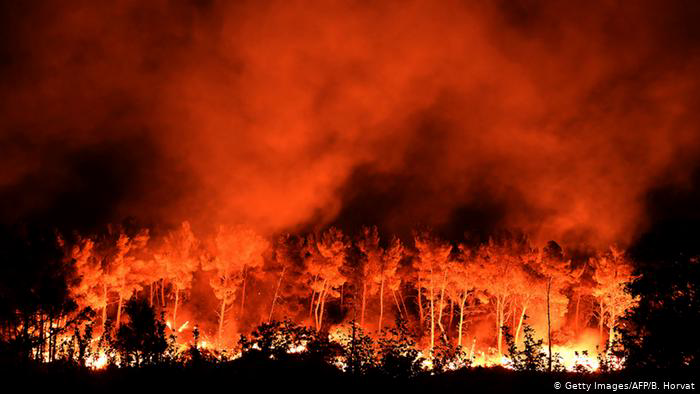

1/1 [==============================] - 0s 139ms/step
Forest fire


In [27]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/19464620_401.jpg')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/IBM/forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('No danger')
      break
    else:
      print("Forest fire")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [28]:
# SENDING ALERT MESSAGE

In [29]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='AC2a45c94082d15fd26a52ef4274bc95bd'
  auth_token='769fa5108da21ef101aba8ef9ee8ce73'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18316035766',
      #to number
      to='+916383605324')
  print(message.sid)
  print("No Danger")
  print("SMS Sent!")
elif pred==1:
  print('Fire Detected')

Fire Detected
